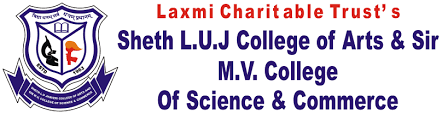

**T118 RAM KUMAR SINGH**

**PRACTICLE NO.7**

AIM: Logistic Regression and Decision Tree

Build a logistic regression model to predict a binary outcome.

Evaluate the model's performance using classification metrics (e.g., accuracy,precision, recall).

Construct a decision tree model and interpret the decision rules for classification.

In [1]:
# --- 1. Loading Libraries and Data ---
from matplotlib.pylab import shape
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import math

In [2]:
# Make plots show in notebook
%matplotlib inline

In [4]:
# Load your Titanic dataset (make sure this file is in your Colab /content/)
df = pd.read_csv(r'/content/Titanic-Dataset.csv')
print("\nData Head:")
print(df.head())
print("Shape of the DataFrame:", df.shape)


Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [5]:
# --- 2. Selecting Features and Target ---
# Target: Survived (0 = No, 1 = Yes)
# We assume there is a 'Survived' column in your Titanic CSV
df['Survived'] = df['Survived'].astype(int)

# Define feature columns (mix of numerical + categorical)
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [6]:
# --- 3. Preprocessing (Handling Missing Values and Encoding) ---

# Handling Missing Values (Imputation)
# Numerical features: Age, Fare
for col in ['Age', 'Fare']:
    df[col] = df[col].fillna(df[col].median())

# Categorical features: Sex, Embarked
for col in ['Sex', 'Embarked']:
    df[col] = df[col].fillna(df[col].mode()[0])  # Impute with mode

# Preprocessing: Convert categorical features to numerical using LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])         # typically male/female -> 0/1
df['Embarked'] = le.fit_transform(df['Embarked'])  # C, Q, S -> 0/1/2 etc.

# Define X (features) and y (target)
X = df[feature_cols]
y = df['Survived']

print("\nFeatures (X) Head (after encoding and imputation):")
print(X.head())
print("\nTarget (y) Head:")
print(y.head())
print("Shape of X and y:", X.shape, y.shape)


Features (X) Head (after encoding and imputation):
   Pclass   Age  SibSp  Parch     Fare  Sex  Embarked
0       3  22.0      1      0   7.2500    1         2
1       1  38.0      1      0  71.2833    0         0
2       3  26.0      0      0   7.9250    0         2
3       1  35.0      1      0  53.1000    0         2
4       3  35.0      0      0   8.0500    1         2

Target (y) Head:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
Shape of X and y: (891, 7) (891,)


In [7]:
# --- 4. Splitting Data ---
# split X and y into training and testing sets (test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)
print("\nTrain-Test Split complete.")
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)



Train-Test Split complete.
Train shape: (668, 7) (668,)
Test shape: (223, 7) (223,)


In [8]:
# --- 5. Model Development and Prediction ---
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000, random_state=0)

# fit the model with data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
print("\nPredicted Test Results (y_pred):")
print(y_pred)
print("~" * 20)


Predicted Test Results (y_pred):
[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]
~~~~~~~~~~~~~~~~~~~~


In [9]:
# --- 6. Model Evaluation using Confusion Matrix ---
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cnf_matrix)


Confusion Matrix:
[[116  23]
 [ 23  61]]


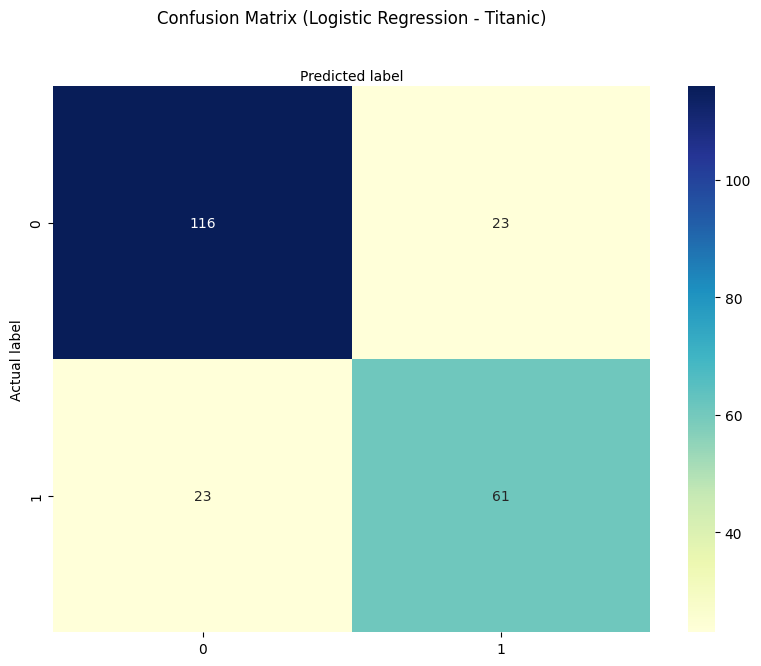

In [10]:
# --- 7. Visualizing Confusion Matrix using Heatmap ---
class_names = ['Not Survived', 'Survived']  # name of classes
fig, ax = plt.subplots(figsize=(8, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),
            annot=True,
            cmap="YlGnBu",
            fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix (Logistic Regression - Titanic)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
plt.close()

In [11]:
# --- 8. Confusion Matrix Evaluation Metrics ---
print("\n--- Model Evaluation Metrics ---")
print("Accuracy:",  metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:",    metrics.recall_score(y_test, y_pred))


--- Model Evaluation Metrics ---
Accuracy: 0.7937219730941704
Precision: 0.7261904761904762
Recall: 0.7261904761904762



ROC AUC Score: 0.8658359027064063


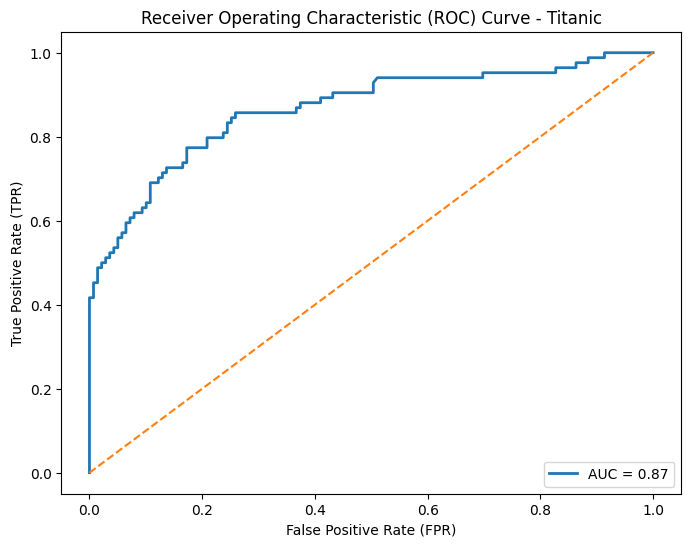

In [12]:
# --- 9. ROC Curve ---
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

print("\nROC AUC Score:", auc_score)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Titanic')
plt.legend(loc="lower right")
plt.show()
plt.close()

**TREE**

In [13]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported ")

%matplotlib inline

Libraries imported 


In [14]:
# --- Step 1: Data Loading and Selection ---
df = pd.read_csv('/content/Titanic-Dataset.csv')
print("DataFrame of Titanic dataset created")

# Using the first 5 rows to inspect the data
print(df.head())
print("Shape of the DataFrame:", df.shape)

# Selecting features (X) and the target label (y)
# Target (y): Survived (0/1) -> Classification Task
# Features (X): a mix of key numerical and categorical features from the Titanic dataset
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

DataFrame of Titanic dataset created
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0          

In [15]:
# --- Step 2: Cleaning DataSet ---
print("\nCleaning DataSet")
# Finding NULL instances
null_counts = df.isnull().sum()
print("NULL instances per column:")
print(null_counts)

# Handle missing values
# Numerical: Age, Fare -> fill with median
for col in ['Age', 'Fare']:
    df[col] = df[col].fillna(df[col].median())

# Categorical: Sex, Embarked -> fill with mode
for col in ['Sex', 'Embarked']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Target variable: Survived (already 0/1 usually, but ensure it's int)
df['Survived'] = df['Survived'].astype(int)

# Encode categorical features: Sex, Embarked
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])          # male/female -> 0/1
df['Embarked'] = le.fit_transform(df['Embarked'])  # C/Q/S -> 0/1/2

print("\nCategorical variables encoded to numerical.")
print(df.head())



Cleaning DataSet
NULL instances per column:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Categorical variables encoded to numerical.
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [16]:
# --- Step 3: Feature/Label Separation and Train/Test Split ---
# X- Features  y- Label
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']
print("\nX (Features) and y (Label) defined.")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Doing train_test_split
from sklearn.model_selection import train_test_split
# Ensure the random state is the same for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)
print(f"Data split into Training ({len(X_train)} samples) and Testing ({len(X_test)} samples) sets.")


X (Features) and y (Label) defined.
X shape: (891, 7)
y shape: (891,)
Data split into Training (623 samples) and Testing (268 samples) sets.


In [17]:
# --- Step 4: Training the model ---
from sklearn.tree import DecisionTreeClassifier
# Using the specified parameters
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X_train, y_train)
print("\nDecision Tree Classifier trained (criterion='gini', unpruned).")



Decision Tree Classifier trained (criterion='gini', unpruned).


Accuracy (Test Set):  76.86567164179104
Accuracy (Training Set):  98.07383627608347


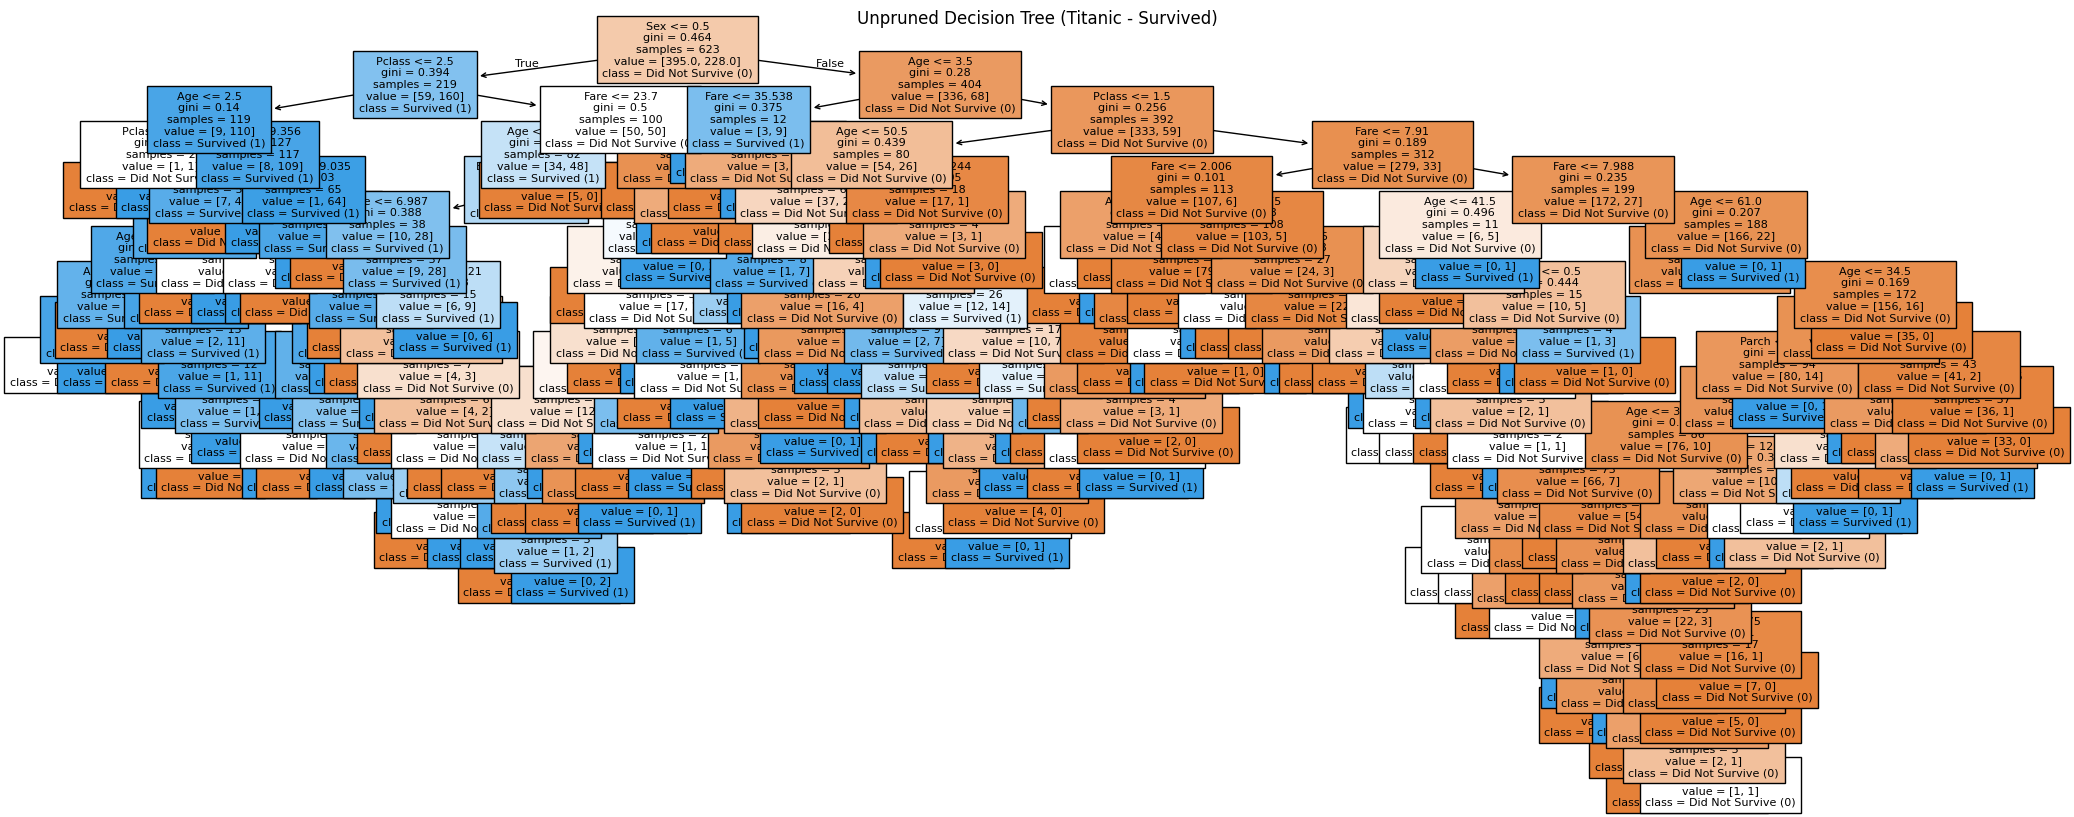


--- Test Set Evaluation (Unpruned) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.65      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268

Confusion Matrix:
[[132  22]
 [ 40  74]]

--- Training Set Evaluation (Unpruned) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       395
           1       0.99      0.96      0.97       228

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623

Confusion Matrix:
[[393   2]
 [ 10 218]]


In [18]:
# --- Step 5: Checking Accuracy and Evaluation (Unpruned Model) ---
from sklearn.metrics import accuracy_score
predictions_test = clf.predict(X_test)
print("Accuracy (Test Set): ", accuracy_score(y_test, predictions_test) * 100)

predictions_train = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, predictions_train)
print("Accuracy (Training Set): ", train_accuracy * 100)

# Visualizing our final decision tree (unpruned)
from sklearn import tree
plt.figure(figsize=(25, 10))   # smaller size than 400x55 but still readable
tree.plot_tree(
    clf,
    feature_names=X.columns.tolist(),
    class_names=['Did Not Survive (0)', 'Survived (1)'],
    filled=True,
    fontsize=8
)
plt.title("Unpruned Decision Tree (Titanic - Survived)")
plt.show()

# Evaluating our test dataset
from sklearn.metrics import classification_report, confusion_matrix
print("\n--- Test Set Evaluation (Unpruned) ---")
print("Classification Report:")
print(classification_report(y_test, predictions_test, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

# Evaluating our training dataset
print("\n--- Training Set Evaluation (Unpruned) ---")
print("Classification Report:")
print(classification_report(y_train, predictions_train, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_train, predictions_train))


--- ROC Curve Data (Unpruned) ---
FPR (First 5): [0.         0.13636364 0.14285714 0.16233766 1.        ]
TPR (First 5): [0.         0.61403509 0.64912281 0.70175439 1.        ]
Threshold (First 5): [ inf 1.   0.75 0.5  0.  ]
AUC Score: 0.7718728639781272


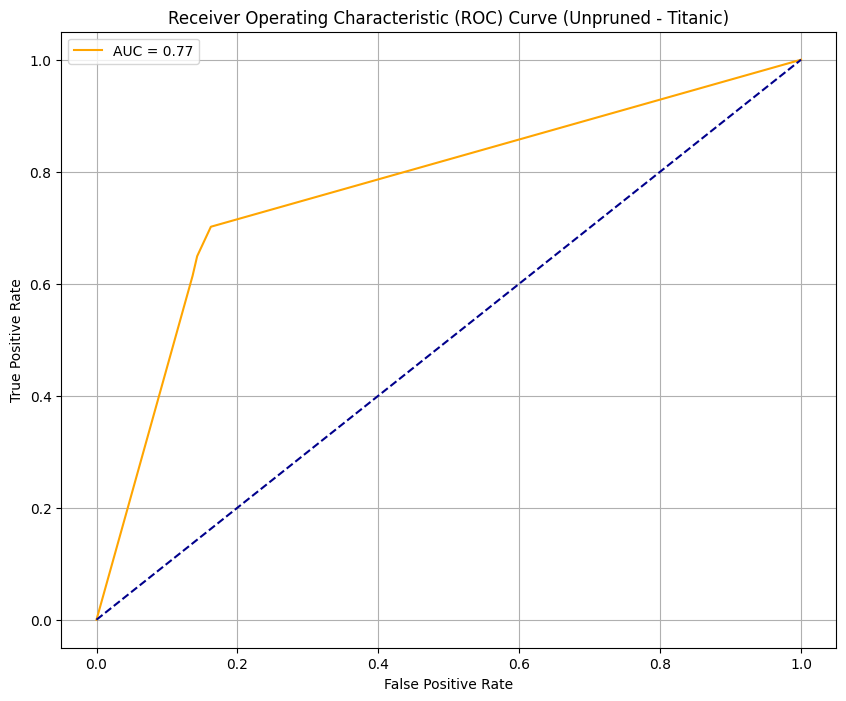

In [19]:
# --- Step 6: ROC Curve Analysis (Unpruned Model) ---
from sklearn.metrics import roc_curve, auc, roc_auc_score

dt_probs = clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

print("\n--- ROC Curve Data (Unpruned) ---")
print("FPR (First 5):", fpr_dt[:5])
print("TPR (First 5):", tpr_dt[:5])
print("Threshold (First 5):", thresholds_dt[:5])

auc_score_dt = auc(fpr_dt, tpr_dt)
print("AUC Score:", auc_score_dt)

def plot_roc_curve(fpr, tpr, auc_score):
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='orange', label='AUC = %0.2f' % auc_score)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Unpruned - Titanic)')
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_curve(fpr_dt, tpr_dt, auc_score_dt)

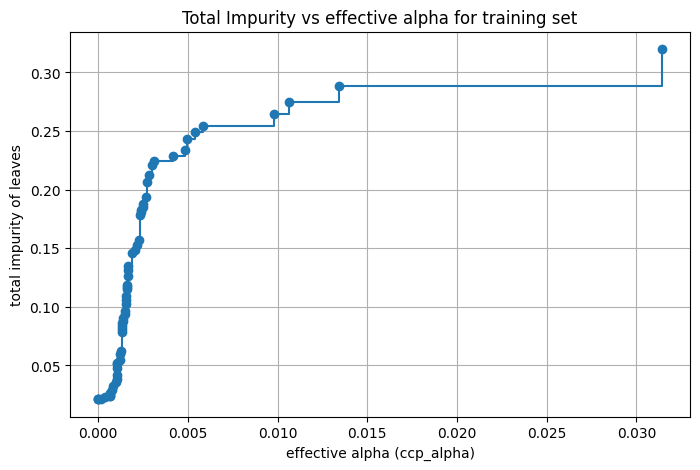

Number of nodes in the last tree is: 3 with ccp_alpha: 0.03141475152474414


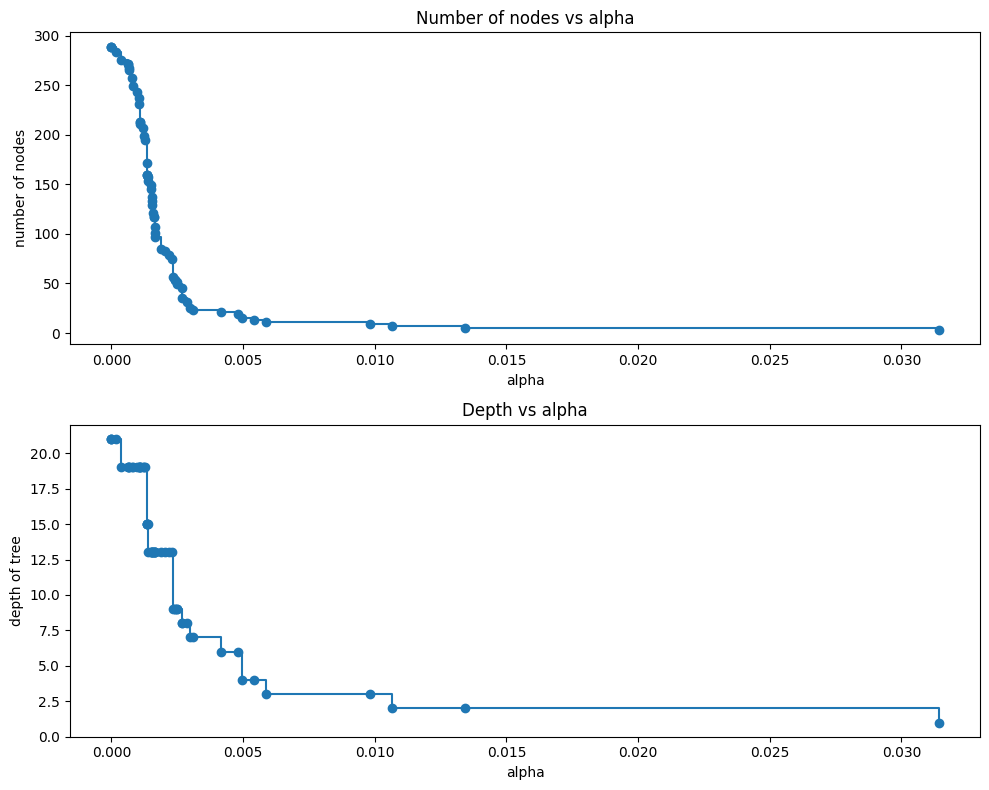

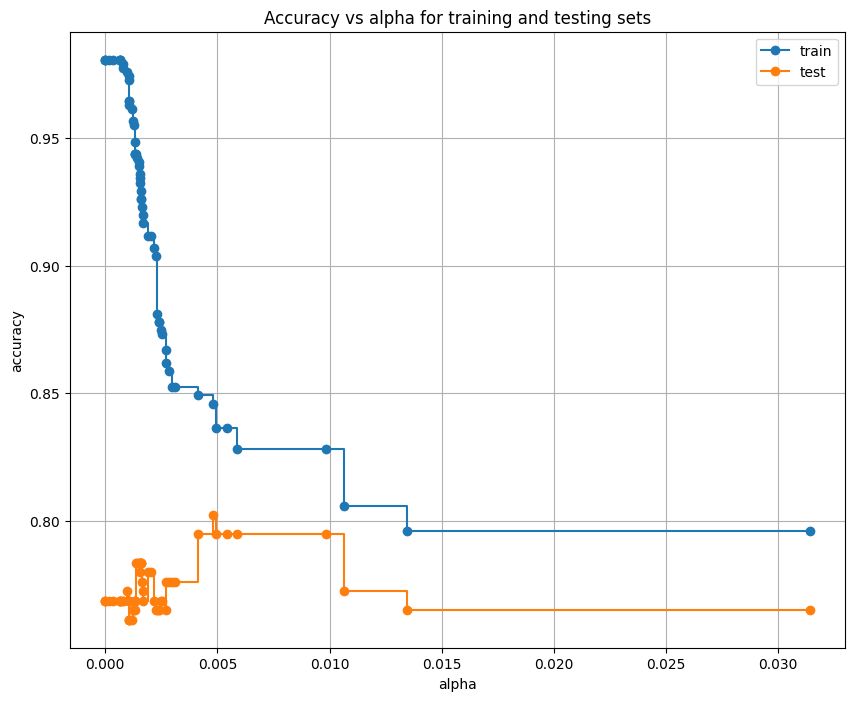

In [20]:
# --- Step 7: Pruning of our Decision Tree ---
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizing alpha w.r.t impurity of leaves
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha (ccp_alpha)")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.grid()
plt.show()

# Train trees for different alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_temp.fit(X_train, y_train)
    clfs.append(clf_temp)

# Remove the last element which is the trivial tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

node_counts = [clf_temp.tree_.node_count for clf_temp in clfs]
depth = [clf_temp.tree_.max_depth for clf_temp in clfs]

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

fig.tight_layout()
plt.show()

train_scores = [clf_temp.score(X_train, y_train) for clf_temp in clfs]
test_scores = [clf_temp.score(X_test, y_test) for clf_temp in clfs]

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()



Optimal ccp_alpha based on test accuracy: 0.0048
Accuracy (Test Set, Pruned with alpha=0.0048): 0.8022
Accuracy (Training Set, Pruned with alpha=0.0048): 0.8459


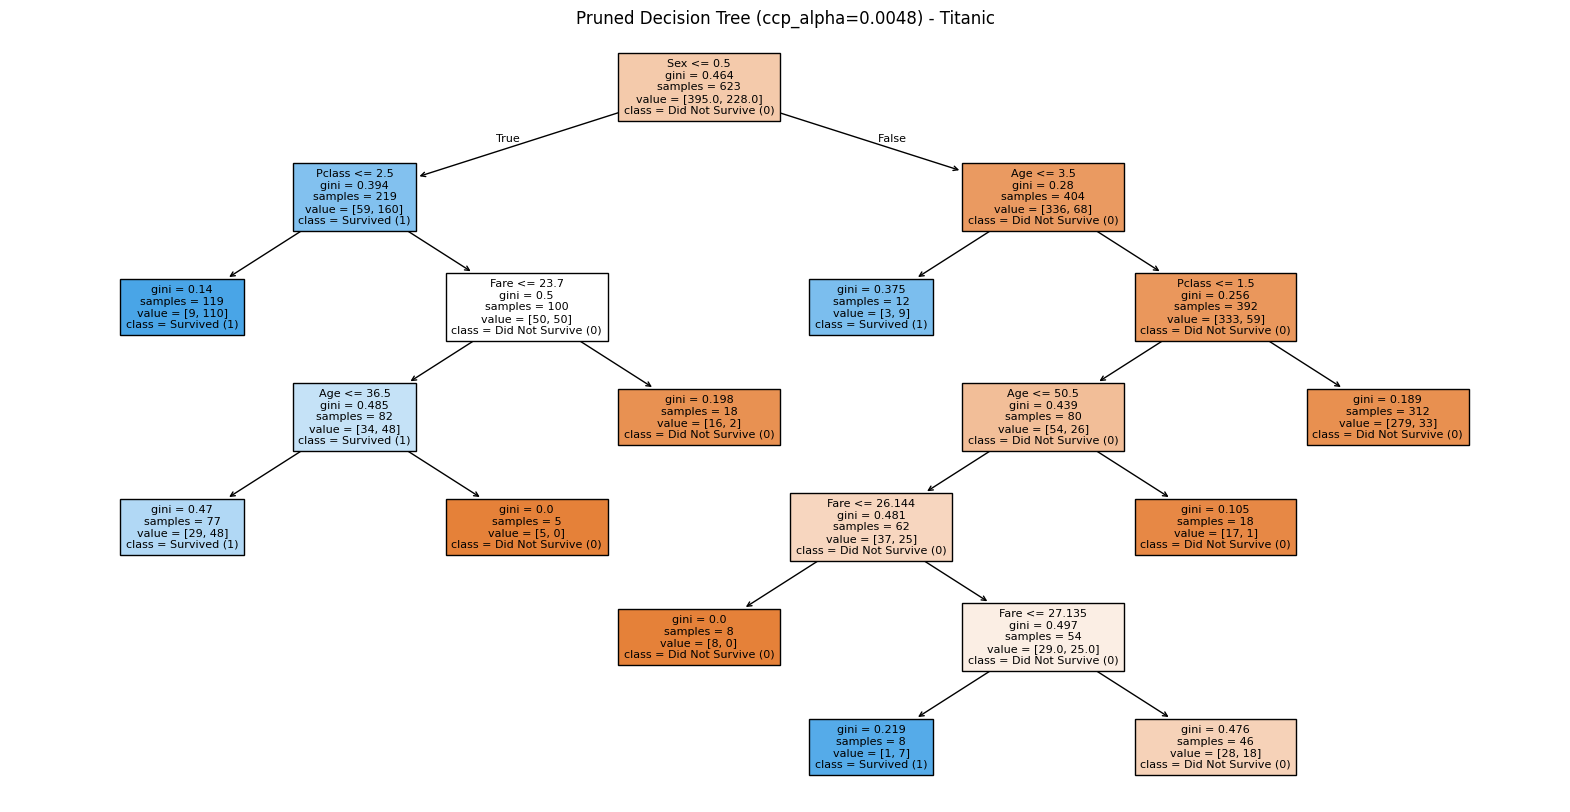

In [21]:
# --- Step 8: Final Pruned Model ---
# Find the alpha that maximizes test accuracy
optimal_alpha_index = np.argmax(test_scores)
optimal_ccp_alpha = ccp_alphas[optimal_alpha_index]
print(f"\nOptimal ccp_alpha based on test accuracy: {optimal_ccp_alpha:.4f}")

# You can either use optimal_ccp_alpha or a fixed one like 0.016 (from reference).
# Here I’ll use optimal_ccp_alpha to be data-driven:
clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_ccp_alpha)
clf_pruned.fit(X_train, y_train)

# Accuracy of test dataset
pred = clf_pruned.predict(X_test)
pruned_test_accuracy = accuracy_score(y_test, pred)
print(f"Accuracy (Test Set, Pruned with alpha={optimal_ccp_alpha:.4f}): {pruned_test_accuracy:.4f}")

# Accuracy of training dataset
pred_1 = clf_pruned.predict(X_train)
pruned_train_accuracy = accuracy_score(y_train, pred_1)
print(f"Accuracy (Training Set, Pruned with alpha={optimal_ccp_alpha:.4f}): {pruned_train_accuracy:.4f}")

# Visualizing after pruning
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf_pruned,
    feature_names=X.columns.tolist(),
    class_names=['Did Not Survive (0)', 'Survived (1)'],
    filled=True,
    fontsize=8
)
plt.title(f"Pruned Decision Tree (ccp_alpha={optimal_ccp_alpha:.4f}) - Titanic")
plt.show()